<a href="https://colab.research.google.com/github/truongkhng/AI-Projects/blob/main/Emotions_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [36]:
def create_img_dataset(raw_folder,dataset_name):

    target_size = (150, 150)
    pictures = []
    labels = []

    for folder in listdir(raw_folder):
      #print("Folder=",folder)
      for file in listdir(raw_folder + "/" + folder):
        #print("File=", file)
        pictures.append(cv2.resize(cv2.imread((raw_folder + "/" + folder + "/" + file),cv2.IMREAD_GRAYSCALE)
                                              ,dsize = target_size))
        labels.append(folder)

    pictures = np.array(pictures)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)

    with open (dataset_name, mode = 'wb') as file:
    # dump information to that file
      pickle.dump((pictures,labels), file)

    file.close()

def load_data(dataset_path):

    file = open(dataset_path, mode = 'rb')
    # dump information to that file
    (pictures, labels) = pickle.load (file)
    file.close()

    return pictures, labels

In [37]:
raw_folder = "/content/drive/MyDrive/Emotions"

create_img_dataset(raw_folder= raw_folder,dataset_name= 'emotions.txt')
dataset_path = "emotions.txt"
x_data,y_data = load_data(dataset_path= 'emotions.txt')

x_train = x_data
y_train = y_data


In [38]:
print(x_train.shape)
print(y_train.shape)


(120, 150, 150)
(120, 4)


In [39]:
x_train_original = x_train;
y_train_original = y_train;
x_label = ['Angry','Happy','Sad','Surprise']

x_train = x_train.astype('float32')
x_train /= 255.0

In [40]:
model = Sequential()
model.add (Conv2D(32,(3,3),activation='relu',kernel_initializer='normal',padding='same',
                  input_shape=(150,150,1)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_10 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization_11 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                      

In [ ]:
checkpoint = ModelCheckpoint(filepath= "Emotions-weights-{epoch:02d}-{accuracy:.4f}.h5", monitor='0accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=100,batch_size = 128, verbose=1,callbacks=callbacks_list)

In [42]:
model_json = model.to_json()
with open('Emotions_config.json', 'w') as json_file:
    json_file.write(model_json)

picture  97
actual: [1 0 0 0]
predictions: [2]
predictions label: Sad


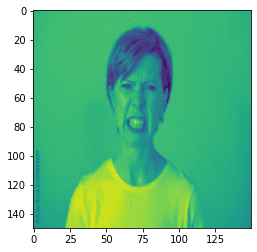

In [45]:
# Show original Image
i = randint(0,len(y_train_original)-1)
print ("picture ",i)
print("actual:", y_train_original[i])
plt.imshow(x_train_original[i])

# Sample Predict
sample = np.array([x_train[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predictions:", predictions)
print("predictions label:", x_label[int(predictions)])

KeyError: ignored

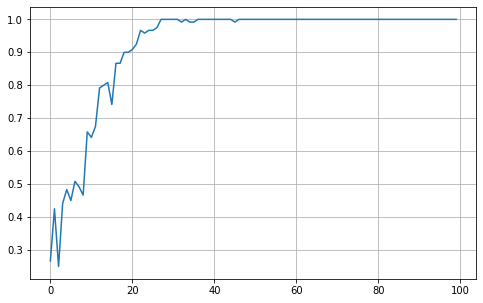

In [44]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()